<a href="https://colab.research.google.com/github/sourakantig/Anime-Data-analysis/blob/main/ANIME_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Visualization On Anime data

---



---


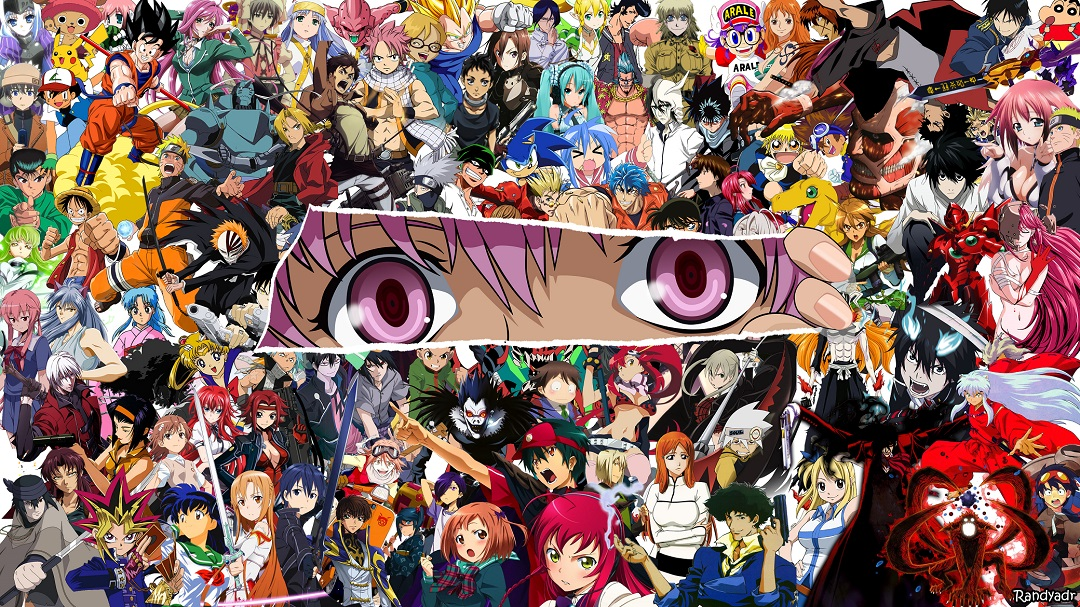



***The best are anime! Despite not having grown up watching anime, I suddenly developed a passion for it after seeing Your lie in april, and after that I was completely drawn into the world of anime. I happen to enjoy the way that anime explains a variety of ideas and concepts, whether it be the feeling of youth that permeates the veins of ambitious teenage boys and girls in sports anime like Haikyuu, Kuroko no Basuke, and Hanebado, or the moral dilemmas that young Kaneki faces in Tokyo Ghoul when attempting to maintain peace in a world where humans and ghouls coexist.***

***I could go on and on about this, but I'll keep it brief and to the point.***

[Dataset Link](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020?select=anime.csv)





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.io as pio
pio.templates.defult="pltly_white"
import plotly.graph_objs as go
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
anime = pd.read_csv('anime.csv')
print(anime.shape)
anime.head()

(17562, 35)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [ ]:
print(anime.info())
print("--------------------------------------------------")
print(anime.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

*NO null values found*

In [ ]:
anime[['Name', 'Score', 'Ranked']]

,Name,Score,Ranked
0,Cowboy Bebop,8.78,28.0
1,Cowboy Bebop: Tengoku no Tobira,8.39,159.0
2,Trigun,8.24,266.0
3,Witch Hunter Robin,7.27,2481.0
4,Bouken Ou Beet,6.98,3710.0
...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,Unknown,Unknown
17558,Mieruko-chan,Unknown,Unknown
17559,Higurashi no Naku Koro ni Sotsu,Unknown,Unknown
17560,Yama no Susume: Next Summit,Unknown,Unknown


## Top 10 animes by their are rated

In [ ]:
ratings = anime[anime['Score']!='Unknown']
ratings_srt = ratings.sort_values('Score', ascending=False).head(10).reset_index()
ratings_srt.Score = ratings_srt.Score.astype(float)
ratings_srt.head() 

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
1,15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",...,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
2,5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",...,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0
3,14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",...,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0
4,9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",...,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0


In [ ]:
fig = px.bar(ratings_srt,x='Score', y='English name',color='English name',orientation='h',text='Type')
fig.update_layout(title='<b>Top 10 anime by rating</b>',title_x=0.5,xaxis_title="Rating",yaxis_title=None, 
                  showlegend=False, xaxis=dict(range=[8.90,9.20],tickmode='linear',tick0=8.90, dtick=0.05))
fig.update_traces(textposition='inside')
fig.show(renderer="colab")

*The highest rated anime is Fullmetal Alchemist: Brotherhood followed by Attack on Titan and Stein's gate.*
*We can also see a relation between type and rating, like how most of the top rated animes are released as TV shows*

## Type of anime

In [ ]:
anime['Type'].value_counts()

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

In [ ]:
fig = px.pie(anime, values = anime['Type'].value_counts() , names=anime['Type'].unique(),hole=.3)
fig.update_layout(title="<b>Type of anime</b>",title_x=0.5, legend_title_text='Type')
fig.update_traces(pull=[0.1,0,0,0,0,0,0])
fig.show(renderer="colab")

*We can conclude from this pie that the majority of anime are TV series, closely followed by OVA.*

## Total shows by rating

In [ ]:
fig = px.histogram(ratings, x='Score', nbins=30)
fig.add_vline(np.mean(ratings.Score), line_width=3, line_dash='dash', line_color='red',annotation_text="Mean="+str(round(np.mean(ratings.Score),2)))
fig.update_layout(title="<b>Total shows by rating</b>", title_x=0.5 ,yaxis_title= "Total count", xaxis_title="Rating" )
fig.show(renderer="colab")

*This graph reveals that the majority of the shows have ratings around 6.5*

## Trending genre in top 100 anime

In [ ]:
gen_dict={}
top_100 = ratings.sort_values('Score', ascending=False).head(100).reset_index()
#top_100['Genres'][0].split(',')
for i in range(100):
  for j in top_100['Genres'][i].split(', '):
    if j in list(gen_dict.keys()):
      gen_dict[j] +=1
    else:
      gen_dict[j] = 1

genre_count = pd.DataFrame(gen_dict, index=np.arange(1)).transpose().reset_index()
genre_count.columns = ['Genre', 'Count']
genre_count = genre_count.sort_values('Count', ascending=False)
genre_count.head()


,Genre,Count
4,Drama,51
3,Comedy,42
0,Action,41
7,Shounen,41
21,Supernatural,31


In [ ]:
fig = px.bar(genre_count, x='Genre', y='Count', text='Count',color_discrete_sequence=['teal'])
fig.update_layout(title = '<b>Trending genre in top 100 anime</b>', title_x = 0.5, yaxis_title='Total shows')
fig.show(renderer="colab")

*We can see from the graph above that the most popular genre in the highest-rated anime series is drama, which is followed by comedy and action.*

## Total anime shows by age rating

In [ ]:
age_rating = anime['Rating'].value_counts().to_frame().reset_index()
age_rating.columns = ['age_rating', 'Count']
age_rating

,age_rating,Count
0,PG-13 - Teens 13 or older,6132
1,G - All Ages,5782
2,PG - Children,1461
3,Rx - Hentai,1345
4,R - 17+ (violence & profanity),1157
5,R+ - Mild Nudity,997
6,Unknown,688


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=age_rating['age_rating'], y=age_rating['Count'], line=dict(color='red', width=2)))
fig.add_trace(go.Bar(x=age_rating['age_rating'], y=age_rating['Count'],marker=dict(color='teal'),text=age_rating['Count']))
fig.update_layout(title="<b>Total shows by age rating</b>", title_x=0.5, showlegend=False,xaxis_title='Age rating', yaxis_title='Total shows')
fig.show(renderer="colab")

*From this graph, we can see that G is closely followed by PG-13 for the majority of the shows*

## Total shows by age rating and type 

In [ ]:
grp_rating = anime.groupby(['Rating', 'Type'])['Type'].count().to_frame()
grp_rating.columns = ['Count']
grp_rating.reset_index(inplace=True)
grp_rating['Count'] = grp_rating['Count'].astype('int')
mean= np.mean(grp_rating['Count'])
#grp_rating

In [ ]:
fig = px.bar(grp_rating, x='Rating', y='Count', color='Type', barmode='group')
fig.update_layout(title="<b>Total shows by age rating and type</b>", title_x=0.5, yaxis_title='Total shows', xaxis_title='Type/Age rating')
fig.add_hline(mean, line_width=2, line_dash='dash', line_color='black',annotation_text='Average number of shows')
fig.show(renderer="colab")

*We can conclude from this graph that the majority of PG-13-rated animes are TV Shows, while the closely related G-rated bar in the preceding graph consists mostly of Movies and Music, followed by TV Shows.*

## Animes released by year

In [ ]:
pilot = anime[anime['Aired'] != 'Unknown'][['Name', 'Aired']]
pilot

,Name,Aired
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999"
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001"
2,Trigun,"Apr 1, 1998 to Sep 30, 1998"
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002"
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005"
...,...,...
17556,Wan Jie Shen Zhu 3rd Season,"Mar 17, 2021 to ?"
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?"
17558,Mieruko-chan,2021 to ?
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?"


In [ ]:
def extract_year(text):
    for i in range(0,len(text)):
        temp = text[i:i+5].strip()
        try:
            return int(temp)
        except:
            continue
#extract_year("test tnr rnr 32 3 2023 gngn")

pilot['Strated'] = pilot['Aired'].apply(extract_year)
pilot


,Name,Aired,Strated
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999",1998
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001",2001
2,Trigun,"Apr 1, 1998 to Sep 30, 1998",1998
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002",2002
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005",2004
...,...,...,...
17556,Wan Jie Shen Zhu 3rd Season,"Mar 17, 2021 to ?",2021
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?",2021
17558,Mieruko-chan,2021 to ?,2021
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?",2021


In [ ]:
year_sorted = pilot['Strated'].value_counts().to_frame().reset_index()
year_sorted.columns = ['year','count']
year_sorted.sort_values('year', inplace=True) 
#year_sorted
mean_count = np.mean(year_sorted['count'])
sc_buffer = year_sorted[year_sorted['count'] == 922]


,year,count
0,2017,922


In [ ]:
fig = px.line(year_sorted, x='year', y='count')
fig.add_hline(mean_count, line_width=2, line_dash='dash', line_color='red', annotation_text='Average number of shows released per year')
fig.add_trace(go.Scatter(x=sc_buffer['year'], y=sc_buffer['count'],marker_size=10,name="Peak"))
fig.update_layout(title="<b>Animes released by year</b>", title_x=0.5, yaxis_title='Total shows')
fig.show(renderer="colab")

*The number of new animes airing has suddenly increased since the year 2000, or from then the graph has only gone up, or until 2017 when it reached its record high, after which there is a sharp decline.*

## Timer series analysis of anime released by their type

In [ ]:
pilot['Type'] = anime['Type']
timeseries_df = pilot.groupby(['Strated','Type']).count().reset_index()
timeseries_df.rename(columns={'Aired':'Count', 
                              'Strated':'Started'},inplace=True)
timeseries_df

,Started,Type,Name,Count
0,1917,Movie,16,16
1,1918,Movie,7,7
2,1924,Movie,3,3
3,1925,Movie,6,6
4,1926,Movie,6,6
...,...,...,...,...
355,2022,Movie,2,2
356,2022,ONA,1,1
357,2022,OVA,1,1
358,2022,TV,6,6


In [ ]:
fig = px.line(timeseries_df, x='Started', y='Count', color = 'Type')
fig.update_layout(title="<b>Timer series analysis of anime released by their type</b>", title_x=0.5, yaxis_title='Totla shows')
fig.show(renderer="colab")